# 1. 와인 속성 분석 및 등급 예측

## (1) 데이터 병합

---
### 1. 데이터 불러오기

In [1]:
# pandas: 테이블 형태의 자료를 다룰 수 있는 라이브러리
import pandas as pd

In [2]:
red_df = pd.read_csv('C:/Users/s/Desktop/data/winequality-red.csv')
white_df = pd.read_csv('C:/Users/s/Desktop/data/winequality-white.csv')

### 2. 불러온 데이터 확인

In [3]:
# red: 1599 X 12 / white: 4898 X 12
red_df
white_df

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...


### 3. 각 데이터에 레드/화이트 와인을 구별할 수 있는 type 변수 추가

In [4]:
red_df.insert(0, column='type', value = 'red')

In [5]:
white_df.insert(0, column='type', value = 'white')

### 4. type 변수 추가 확인

In [6]:
red_df.head()

,type,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,red,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,red,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,red,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,red,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,red,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [7]:
white_df.head()

,type,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,white,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,white,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,white,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,white,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,white,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


### 5. 데이터 크기(shape) 확인

In [8]:
print(red_df.shape)
print(white_df.shape)

(1599, 2)
(4898, 2)


### 6. 데이터 병합

In [9]:
wine = pd.concat([red_df, white_df])
wine.shape

(6497, 2)

In [10]:
wine.to_csv('C:/Users/s/Desktop/data/wine.csv', index=False)

---
**변수 체크**

**독립(입력,설명) 변수 (x)**
* fixed acidity : 고정산
* volatile acidity : 휘발산
* critric acid : 구연산
* residual sugar : 잔당
* chlorides : 염화물
* free sulfur dioxide : 유리 이산화황
* total sulfur dioxide : 총 이산화황
* density : 밀도
* pH
* sulphates : 황산염
* alcohol : 알코올

**종속(출력,반응) 변수 (y)**
* quality : 등급


---
## (2) 데이터 탐색

### 1. 데이터 정보 확인

In [11]:
# 총 6,497개의 샘플, 13개의 변수
# 데이터 타입: type 변수 object(객체), quality 변수 int64 (정수), 나머지 float64(실수)

wine =pd.read_csv('C:/Users/s/Desktop/data/wine.csv', sep=';')
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type,"fixed acidity     6497 non-null   object 
 1   volatile acidity""      6497 non-null   float64
 2   citric acid""           6497 non-null   float64
 3   residual sugar""        6497 non-null   float64
 4   chlorides""             6497 non-null   float64
 5   free sulfur dioxide""   6497 non-null   float64
 6   total sulfur dioxide""  6497 non-null   float64
 7   density""               6497 non-null   float64
 8   pH""                    6497 non-null   float64
 9   sulphates""             6497 non-null   float64
 10  alcohol""               6497 non-null   float64
 11  quality"""              6497 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 609.2+ KB
None


### 2. 변수 공간 제거(빈공간 '_'(under bar)로 변경)

In [12]:
# 변경된 변수명 확인
wine.columns = wine.columns.str.replace(' ', '_')
wine.columns = wine.columns.str.replace('""', '')
wine.columns

Index(['type,"fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality"'],
      dtype='object')

In [13]:
wine.head()

,"type,""fixed_acidity",volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,"quality"""
0,"red,7.4",0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,"red,7.8",0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,"red,7.8",0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,"red,11.2",0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,"red,7.4",0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine.columns = wine.columns.str.replace('quality"', 'quality')

### 3. 변수별 기술통계량 확인

In [15]:
wine.describe()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 4. 개별 변수명 확인

In [16]:
wine['density'].describe()

count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

### 5. 와인 등급 개수 확인

In [17]:
sorted(wine.quality.unique())
# 3~9 등급의 와인이 존재함을 확인

[3, 4, 5, 6, 7, 8, 9]

### 6. 등급 별 와인 개수 확인

In [18]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

---
## (3) 데이터 모델링

### 1. type 별 quality 비교

In [19]:
wine.columns = wine.columns.str.replace('"fixed_acidity', 'fixed_acidity')
wine

,"type,fixed_acidity",volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,"red,7.4",0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,"red,7.8",0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,"red,7.8",0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,"red,11.2",0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,"red,7.4",0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,"white,6.2",0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,"white,6.6",0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,"white,6.5",0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,"white,5.5",0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [20]:
new = wine["type,fixed_acidity"].str.split(",", n = 1, expand = True)

In [21]:
wine["type"]= new[0]
wine["fixed_acidity"]= new[1]
wine.drop(columns =["type,fixed_acidity"], inplace = True)
wine

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,fixed_acidity
0,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,7.4
1,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,7.8
2,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,7.8
3,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,11.2
4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,6.2
6493,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,6.6
6494,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,6.5
6495,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,5.5


### 1. type 별 quality 비교

In [22]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


### 2. 각 통계량만 뽑아내기

In [23]:
wine.groupby('type')['quality'].mean()
wine.groupby('type')['quality'].std()

# 두 가지 통계량 테이블로 생성
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


**t-test (평균차이 검정) & linear regression (회귀분석)**

* scipy : t-test를 위한 라이브러리
* statsmodels : linear regression을 위한 라이브러리
* 명령프롬포트에서 pip install statsmodels 설치 후 사용

In [24]:
from scipy import stats
from statsmodels.formula.api import ols, glm

### 3. 그룹 분리하기

In [25]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

**red / white 와인의 quality에 대한 t-test**
* H0: 두 종류 와인의 quality의 평균은 같다.
* H1: 두 종류 와인의 quality의 평균은 다르다.

In [26]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

**p-value = 8.17e-24**:

검정 결과 p-vlaue가 0.05보다 작으므로 유의수준 5% 하에서 귀무가설은 기각된다.
즉, 두 종류 와인의 quality의 평균은 차이가 있다.
quality 평균을 비교해보면 white 와인의 평균이 약 5.88로 red 와인의 평균 약 5.64보다 높다.
즉, white 와인의 quality가 red 와인에 비해 평균적으로 높다고 말할 수 있다.

**linear regression**

종속변수 quality (y)를 독립변수 11개 (x1~x10)를 사용해 예측하는 모형을 만들고자 한다.
model : y = a0 + a1*x1 + a2*x2 + ... + a10*x10

In [44]:
rm_quality = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'
rm_quality_result = ols(rm_quality, data=wine).fit()
rm_quality_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     25.68
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:21:30   Log-Likelihood:                -7102.3
No. Observations:                6497   AIC:                         1.444e+04
Df Residuals:                    6381   BIC:                         1.522e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                56.0896     12.251      4.578      0.000      32.073      80.106
fixed_acidity[T.10.1]     0.2677      0.271      0.987      0.324      -0.264       0.799
fixed_acidity[T.10.2]    -0.2118      0.217     -0.976      0.329      -0.637       0.214
fixed_acidity[T.10.3]    -0.1918      0.248     -0.774      0.439      -0.677       0.294
fixed_acidity[T.10.4]    -0.2094      0.214     -0.977      0.329      -0.630       0.211
fixed_acidity[T.10.5]     0.2019      0.255      0.792      0.428      -0.298       0.702
fixed_acidity[T.10.6]    -0.1138      0.242     -0.470      0.638      -0.588       0.360
fixed_acidity[T.10.7]     0.3498      0.254      1.375      0.169      -0.149       0.849
fixed_acidity[T.10.8]    -0.3321      0.271     -1.224      0.221      -0.864       0.200
fixed_acidity[T.10.9]    -0.2239      0.295     -0.758      0.448      -0.802       0.355
fixed_acidity[T.11]      -0.6272      0.446     -1.407      0.159      -1.501       0.246
fixed_acidity[T.11.1]     0.1620      0.282      0.574      0.566      -0.391       0.715
fixed_acidity[T.11.2]    -0.0626      0.356     -0.176      0.860      -0.761       0.636
fixed_acidity[T.11.3]     0.0489      0.311      0.157      0.875      -0.560       0.658
fixed_acidity[T.11.4]    -0.0260      0.357     -0.073      0.942      -0.725       0.673
fixed_acidity[T.11.5]    -0.1450      0.249     -0.583      0.560      -0.632       0.342
fixed_acidity[T.11.6]     0.0113      0.255      0.044      0.965      -0.488       0.511
fixed_acidity[T.11.7]     0.2674      0.445      0.601      0.548      -0.604       1.139
fixed_acidity[T.11.8]    -0.2812      0.392     -0.718      0.473      -1.049       0.486
fixed_acidity[T.11.9]     0.0858      0.256      0.335      0.738      -0.416       0.588
fixed_acidity[T.12]       0.4181      0.312      1.341      0.180      -0.193       1.029
fixed_acidity[T.12.1]    -0.5997      0.743     -0.807      0.420      -2.057       0.858
fixed_acidity[T.12.2]    -0.2858      0.392     -0.730      0.466      -1.054       0.482
fixed_acidity[T.12.3]    -0.2716      0.357     -0.761      0.447      -0.971       0.428
fixed_acidity[T.12.4]    -0.0140      0.392     -0.036      0.972      -0.782       0.754
fixed_acidity[T.12.5]    -0.4793      0.312     -1.538      0.124      -1.090       0.131
fixed_acidity[T.12.6]     0.6612      0.393      1.684      0.092      -0.108       1.431
fixed_acidity[T.12.7]    -0.2264      0.393     -0.576      0.564      -0.996       0.543
fixed_acidity[T.12.8]     1.1947      0.358      3.339      0.001       0.493       1.896
fixed_acidity[T.12.9]     0.4643      0.537      0.865      0.387      -0.588       1.516
fixed_acidity[T.13]      -0.4575      0.448     -1.020      0.308      -1.336       0.421
fixed_acidity[T.13.2]  

### 4. 예측 모형을 활용한 등급 예측
### 4-1. 새로운 입력 데이터 생성(new sample)

In [45]:
wine_new = {
    'volatile_acidity' : [0.8, 0.5], 'citric_acid' : [0.3, 0.4], 'residual_sugar' : [6.1, 5.8],
    'chlorides' : [0.055, 0.04], 'free_sulfur_dioxide' : [30.0, 31.0], 'total_sulfur_dioxide' : [98.0, 99], 'density' : [0.996, 0.91],
    'pH' : [3.25, 3.01], 'sulphates' : [0.4, 0.35], 'alcohol' : [9.0, 0.88], 'fixed_acidity' : [8.5, 8.1]
    }

In [46]:
wine_new_df = pd.DataFrame(wine_new)

---
## (4) 데이터 시각화

**와인 type (red/white)에 따른 quality 히스토그램**

* matplotlib, seaborn : 히스토그램 작성을 위한 라이브러리
* 명령프롬포트에서 pip install matplotlib 설치 후 사용
* 명령프롬포트에서 pip install seaborn 설치 후 사용


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

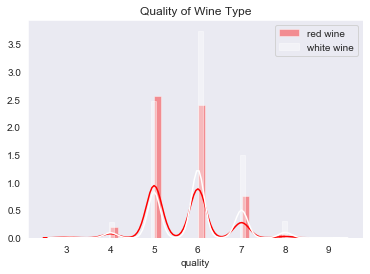

In [35]:
# 히스토그램 차트 배경 스타일 설정
sns.set_style('dark')

# red / white 각각에 대한 displot 객체 생성
sns.distplot(red_wine_quality, kde = True, color = 'red', label = 'red wine')
sns.distplot(white_wine_quality, kde = True, color = 'white', label = 'white wine')

# 차트 제목 생성
plt.title('Quality of Wine Type')

# 차트 범례(legend) 생성
plt.legend()

# 설정대로 차트 표시
plt.show()

### 6. Linear Regression

각 변수가 quality에 미치는 영향력 시각화

density 변수 1개의 영향력 시각화

부분 회귀 계산을 위해 statsmodels.api 로드

In [36]:
import statsmodels.api as sm

In [37]:
# density 변수를 제외한 나머지 others 리스트로 추출
others = list(set(wine.columns).difference(set(['quality', 'density'])))

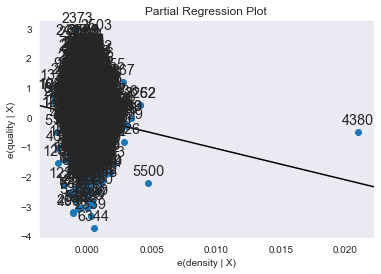

In [38]:
# quality versus density plot
p,resids = sm.graphics.plot_partregress('quality', 'density', others, data = wine, ret_coords = True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\regressionplots.py:561: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


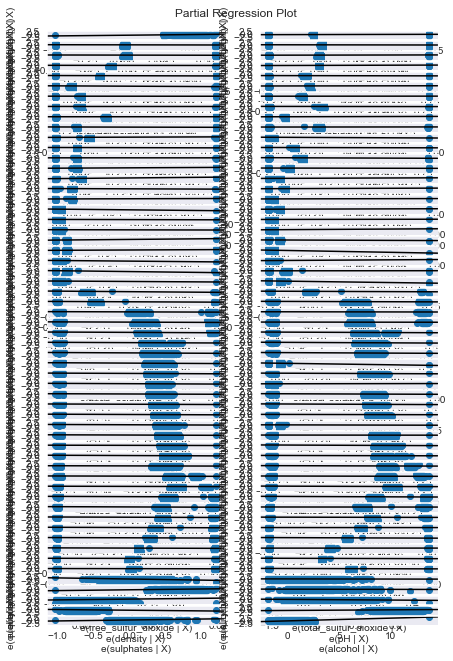

In [39]:
# 전체 변수의 영향력 시각화
fig = plt.figure(figsize=(7, 10))
sm.graphics.plot_partregress_grid(rm_quality_result, fig = fig)
plt.show()